# Solutions for Bayesian Inference and Data Assimilation, Homework 8




# Exercise 1
Consider the Markov transition kernel $\pi(z'|z)$ and two PDFs $\pi_1$, and $\pi_2$. Define

$$
\hat{\pi}_i(z') = \int_{\mathbb{R}} \pi(z'|z) \pi_i(z)\text{d}z,\hspace{1cm} i=1,2.
$$

and show that

$$
d_{\text{TV}}(\hat{\pi}_1,\hat{\pi}_2) \leq d_{\text{TV}}(\pi_1,\pi_2)
$$

with the TV-distance $d_{\text{TV}}(\mu,\nu)$ defined by

$$
d_{\text{TV}}(\mu,\nu) = \frac{1}{2} \sup_{|f|_{\infty}\leq 1} \left| \mathbb{E}_{\mu}[f] - \mathbb{E}_\nu[f] \right|
$$

show this using only the above definition.

**Solution**

In the following we use the shorthand $\pi [f] =\mathbb{E}_{\pi} [f]$. All the integrals in the proof below are over $\mathbb{R}$. First note that

$$
\hat{\pi}_i [f] = \int \int f (x') \pi (z' | z  ) \pi_i (z) \text{d}  z' \text{d} z = \int \hat{f} (z) \pi_i (z) \text{d}z = \pi_i [\hat{f}]
$$

where above we have defined the function $\hat{f} (z) = \int f (z') \pi (z'|z) \text{d} z'$. Also note that if $f$ is bounded, i.e. $| f (x)|\leq M$ for some $M \in \mathbb{R}$, then $\hat{f} (z)$ is also bounded because

$$
|\hat{f} (z) | = \left| \int f (z') \pi (z' | z  )  \text{d} z' \right| \leq \int | f(z') | | \pi (z' | z  ) | \text{d} z'\leq | f (z') | \int \pi (z' | z  ) \text{d} z' = | f (z') | \leq M
$$

In particular we consider $f$ with $| f |_{\infty} \leq 1$. Thus,

\begin{aligned}
d_{\text{TV}} (\hat{\pi}_1, \hat{\pi}_2) &= \frac{1}{2} \sup_{|f|_{\infty} \leq 1} | \hat{\pi}_1 [f] - \hat{\pi}_2 [f] |\\
& = \frac{1}{2} \sup_{| f |_{\infty} \leq 1} | \pi_1 [\hat{f}] - \pi_2[\hat{f}]|\\
& = \frac{1}{2} \sup_{| f |_{\infty} \leq 1} \left| \int \hat{f} (z)(\pi_1 (z) - \pi_2 (z)) \text{d} z \right|\\
& \leq \frac{1}{2} \sup_{| f |_{\infty} \leq 1} | \hat{f} (z)|\int|\pi_1 (z) - \pi_2 (z  ) | \text{d} z\\
& \leq \frac{1}{2} \sup_{| f |_{\infty} \leq 1} | f (z)|\int|\pi_1 (z) - \pi_2 (z  ) | \text{d} z\\
& \leq \frac{1}{2} \int |   \pi_1 (z) - \pi_2 (z)|\text{d} z\\
& = d_{\text{TV}} (\pi_1, \pi_2)
\end{aligned}

as desired.

# Exercise 2
Let $X$ be a random variable and $F_X$ its CDF and $\pi_X$ its PDF. Suppose we are given a guess $F$ of the CDF of $X$. We define

$$
T_x(y) := \left\{
    \begin{array}{ll}
1, & \text{if }x\leq y\\
0, & \text{otherwise}
\end{array}
\right.
$$

$T$ can be interpreted as the CDF of the distribution that places unit mass at $x$. The continuous ranked probability score is defined as

$$
S_{crps}(F,x) = \int_{y\in\mathbb{R}} (F(y)-T_x(y))^2 \text{d}y
$$

Prove that,

$$
\begin{aligned}
\mathbb{E}[S_{crps}(F,X)] &= \int_{x\in\mathbb{R}} S_{crps}(F,x)\pi_X(x)\text{d}x\\
&= \int_{y\in\mathbb{R}} (F(y)-F_X(y))^2 \text{d}y + \int_{y\in\mathbb{R}}F_X(y)(1-F_X(y))dy
\end{aligned}
$$

**Solution**.

Before proceeding with the main proof we note the following. Since $T_x (y)$
does not vanishes only when $x \leq y$, then for any suitable function $f :\mathbb{R} \rightarrow \mathbb{R}$ we have that $T_x (y) f (x) = f (x)$ if $x\leq y$ and 0 otherwise; hence,

$$
\int_{x \in \mathbb{R}} T_x (y) f (x) \text{d}x = \int_{- \infty}^y f (x)\text{d}x
$$

In particular for a p.d.f. $\pi_X$ we find

$$
\int_{x \in \mathbb{R}} T_x (y) \pi_X (x) \text{d}x = \int_{- \infty}^y\pi_X (x) \text{d}x = F_X (y)
$$

We also note that clearly $T_x (y)^2 = T_x (y)$. Now, we use this and the explained above and proceed with the proof. We then compute

$$
\begin{aligned}
\mathbb{E} [S_{\text{crps}} (F, X)] & = \int_{x \in \mathbb{R}}S_{\text{crps}} (F, x) \pi_X (x) \text{d} x\\
& = \int_{y \in \mathbb{R}} \int_{x \in \mathbb{R}} (F (y)^2 - 2 F (y)
  T_x (y) - T_x (y)^2) \pi_X (x) \text{d} x \text{d} y\\
& =  \int_{y \in \mathbb{R}} F (y )^2 \text{d} y \underset{=
  1}{\underbrace{\int_{x \in \mathbb{R}} \pi_X (x) \text{d}x}} - \int_{y \in
  \mathbb{R}} 2 F (y) \underset{= F_X (y)}{\underbrace{\left( \int_{x \in
  \mathbb{R}} T_x (y) \pi_X (x) \text{d}x \right)}} \text{d} y +\\
& + \int_{y \in \mathbb{R}} \underset{=F_X (y)}{\underbrace{\int_{x \in
  \mathbb{R}} T_x (y) \pi_X (x) \text{d}x}}\\
& =  \int_{y \in \mathbb{R}} F (y)^2 \text{d} y - \int_{y \in \mathbb{R}} 2
  F (y) F_X (y) \text{d} y + \int_{y \in \mathbb{R}} F_X (y) \text{d} y\\
& =  \int_{y \in \mathbb{R}} (F (y)^2 - 2 F (y) F_X (y) + F_X (y)^2)
  \text{d} y + \int_{y \in \mathbb{R}} (F_X (y) - F_X (y)^2) \text{d} y\\
& =  \int_{y \in \mathbb{R}} (F (y) - F_X (y))^2 \text{d} y + \int_{y \in
  \mathbb{R}} F_X (y) (1 - F_X (y)) \text{d} y
\end{aligned}
$$

as desired.

# Exercise 3
We now use the method developed in Exercise 3 of the last sheet to sample a more complicated distribution. Assume you are a measuring the size of members of some animal species. The distribution of the height is given as

$$
\pi(x) = \frac{1}{C}\exp(-V(x)),
$$

with

$$
V(x) = ((x-4)^2-2)^2
$$

and $C$ chosen such that $\pi(z)$ is a p.d.f. The following SDE

$$
\frac{\text{d}}{\text{d}t}X_t = -\nabla V(x) + \sqrt{2}\frac{\text{d}B_t}{\text{d}t}
$$

has invariant distribution $\pi$.

## Task 1
Plot $\pi$ for $C=1$.

**Solution.**

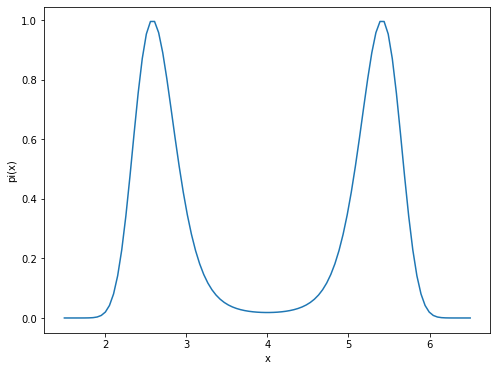

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Define pi
def pi(x):
    return np.exp(-((x-4)**2 -2)**2)

# Plot pi(x) for 1.5<x<6.5
plt.plot(
    np.linspace(1.5, 6.5, 100),
    pi(np.linspace(1.5, 6.5, 100))
)
plt.xlabel("x")
plt.ylabel("pi(x)")
plt.gcf().set_size_inches(8,6)
plt.show()

From the above we observe $\text{supp}(\pi(x))$ is all the real numbers; however, the p.d.f. goes to zero very fast for $x<2$ or $x>6$, i.e. most of the mass is in $2<x<6$.

## Task 2
Repeat Task (ii) from last sheet (Ex 3), but for the above SDE and only for $\delta t = 0.01$.

**Solution.**

The Euler-Mayurama scheme of the given SDE is

$$
x_{n+1} = x_n - \delta t \nabla V(x_n) + \sqrt{2\delta t}\xi_n
$$

where $\nabla V(x_n) = 4(x_n-4)((x_n-4)^2-2)$, and $\xi_n=\Xi_n(\omega)$, with $\Xi_n\sim\mathcal{N}(0,\sigma^2)$. Below we have the implementation with $\sigma^2=1$, and $x_0=1$.

In [ ]:
import numpy as np
# The gradient of the potential
def grad_v(x):
    return 4*(x-4)*((x-4)**2 - 2)

# Program that does the simulation
def mayorama_sim(x0, t_f, dt, N, mu=0, sigma=1):

    n = int(t_f/dt)
    X = np.zeros((n,N))
    sqrt_dt = np.sqrt(2*dt)
    X[0] = x0

    for i in range(n-1):

        X[i+1] += X[i] - dt*grad_v(X[i]) + sqrt_dt*(sigma*np.random.randn(N)+mu)

    return X

# The simulation for the given dt = 0.01
x0 = 1
t_f = 100
dt = 0.01
N = 10000

X_001 = mayorama_sim(x0, t_f, dt, N)

Below we plot the histograms (as densities) of the distributions in our simulation at different times.

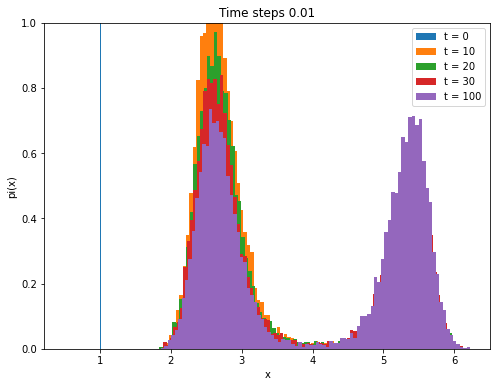

In [ ]:
import matplotlib.pyplot as plt

dt = 0.01
plt.hist(X_001[int(0.0/dt)], bins=90 ,density = True, label="t = 0")
plt.hist(X_001[int(10.0/dt)], bins=90 ,density = True, label="t = 10")
plt.hist(X_001[int(20.0/dt)], bins=90 ,density = True, label="t = 20")
plt.hist(X_001[int(30.0/dt)], bins=90 ,density = True, label="t = 30")
plt.hist(X_001[int(100.0/dt)-1], bins=90, density = True, label="t = 100")
plt.xlabel('x')
plt.ylabel('pi(x)')


plt.ylim([0,1])
plt.legend()
plt.title("Time steps 0.01")
plt.gcf().set_size_inches(8,6)
plt.show()

We also determine the normalization constant $C$. The integral $\int_{x\in\mathbb{R}}\pi(x)dx$ does not have a closed form; however, one can find a numerical approximation, as seen below.

In [ ]:
import scipy.integrate as integrate
integrate.quad(pi, -np.inf, +np.inf)[0]  # approximation

1.340445118332544

Therefore,

$$
\pi(x) = \frac{1}{C}\exp(- ((x-4)^2 - 2)^2), \hspace{1cm} C\approx 1.34045
$$

## Task 3
Repeat Task (iii) from the last sheet, but for the above SDE.

**Solution.**

From the above we can observe that the distributions seem to converge to $\pi(x)$ as $t\rightarrow\infty$. At the beginning the distributions resemple $\pi(x)$ but with the first peak being higher, at times goes on this peak decreases and the other one increases to compensate until they are both the same size. This is clearly seen in the plots of the mean and the variance below.

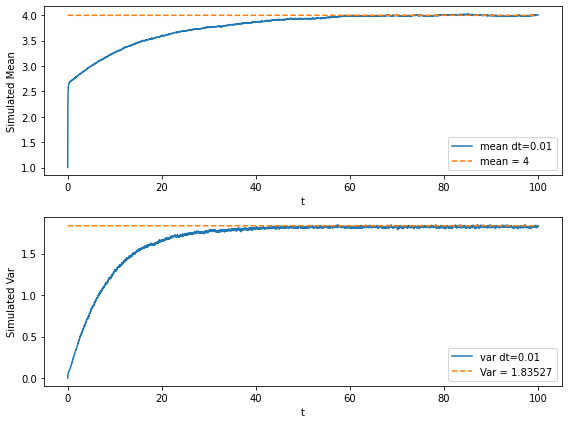

In [ ]:
mus_001 = np.zeros(int(100/0.01)) # μ (mean)
sig_001 = np.zeros(int(100/0.01)) # σ

for n in range(int(100/0.01)):
    mus_001[n] = np.mean(X_001[n])
    sig_001[n] = np.var(X_001[n])

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot( np.arange(int(100/0.01))*0.01, mus_001, label = 'mean dt=0.01')
plt.plot( np.arange(int(100/0.01))*0.01, np.zeros(int(100/0.01)) + 4,
ls = "--", label = 'mean = 4')
plt.xlabel('t')
plt.ylabel('Simulated Mean')
plt.legend(loc= "lower right")

plt.subplot(2,1,2)
plt.plot( np.arange(int(100/0.01))*0.01, sig_001, label = 'var dt=0.01')
plt.plot( np.arange(int(100/0.01))*0.01, np.zeros(int(100/0.01)) + 1.83527,
ls = "--",label = 'Var = 1.83527')
plt.xlabel('t')
plt.ylabel('Simulated Var')
plt.legend(loc= "lower right")

# Some formatting
plt.gcf().set_size_inches(8,6)
plt.tight_layout()
plt.show()

In the plots above we observe that the expected values converges to 4 from below, this is what we already observed in the distributions of our simulations, where the first peak is at the beginning higher; hence, moving the mean to the left of the mean of $\pi(x)$. We finish this by plotting the distribution at $t=100$ together with $\pi(x)$.

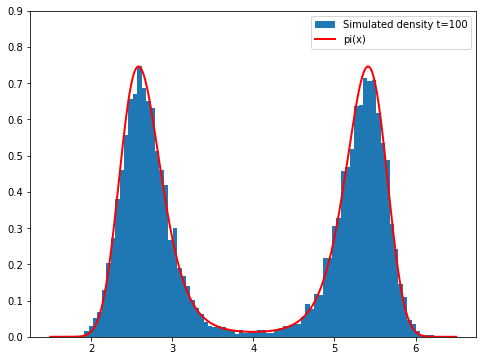

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.hist(X_001[-1], density=True, bins=80, label='Simulated density t=100')
x_pi= np.linspace(1.5, 6.5, 1000)
y_pi = 1/1.34045 * pi(x_pi)
plt.plot(x_pi, y_pi, color='red',linewidth=2, label="pi(x)")

plt.ylim([0,0.9])
plt.legend()
plt.gcf().set_size_inches(8,6)
plt.show()

## Task 4
Using the samples from Task 2 at time T = 100, what do you expect to be the amount of animal who have a size greater than 6?

**Solution**.

From the plot above ($X_{t=100}$) we can confidently say that we get that the probability that $X_{t=100}$ is greater than 6 is for practically purposes 0, i.e. all the animals don't have size greather than 6.